In [1]:
import pandas as pd

counts = pd.read_csv('variant_counts.csv')
counts.head()

,chrom,pos,ref,A,C,G,T,indel,heterozygous,non_mut,null
0,NC_000962.3,11,A,0,0,0,0,0,0,112,8513
1,NC_000962.3,19,T,0,0,0,0,0,0,441,8184
2,NC_000962.3,22,G,0,0,0,0,0,0,532,8093
3,NC_000962.3,29,C,0,0,0,0,0,0,869,7756
4,NC_000962.3,31,A,0,0,0,0,0,0,952,7673


In [5]:
# Check counts sum up to number of samples

s = counts['A'] + counts['C'] + counts['G'] + counts['T'] + counts['indel'] + counts['heterozygous'] + counts['non_mut'] + counts['null']
print(s.head())
s.unique()

0    8625
1    8625
2    8625
3    8625
4    8625
dtype: int64


array([8625])

In [6]:
# Make frequency (relative to total number of samples) table

freq = counts.copy()
for key in ['A','C','G','T','indel','heterozygous','non_mut','null']:
    freq[key] = freq[key] / s[0]
freq.head()

,chrom,pos,ref,A,C,G,T,indel,heterozygous,non_mut,null
0,NC_000962.3,11,A,0.0,0.0,0.0,0.0,0.0,0.0,0.012986,0.987014
1,NC_000962.3,19,T,0.0,0.0,0.0,0.0,0.0,0.0,0.051130,0.948870
2,NC_000962.3,22,G,0.0,0.0,0.0,0.0,0.0,0.0,0.061681,0.938319
3,NC_000962.3,29,C,0.0,0.0,0.0,0.0,0.0,0.0,0.100754,0.899246
4,NC_000962.3,31,A,0.0,0.0,0.0,0.0,0.0,0.0,0.110377,0.889623


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd16b064160>,
      dtype=object)

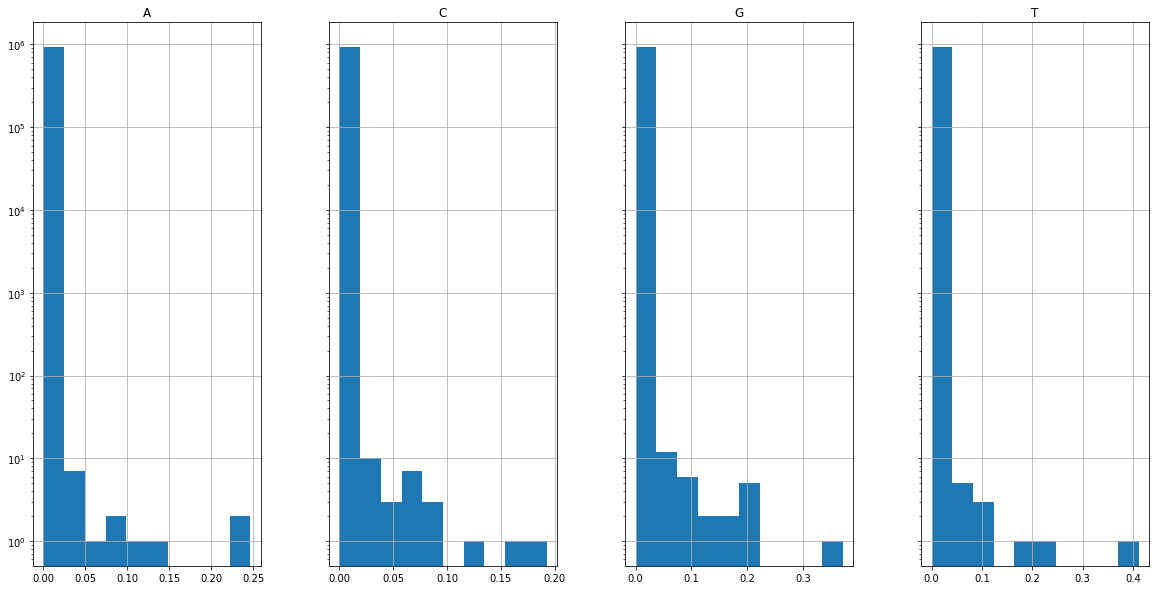

In [7]:
# Freq histogram

freq.hist(column=['A','C','G','T'], sharey=True, layout=(1, 4), figsize=(20,10), log=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd15f733da0>,
      dtype=object)

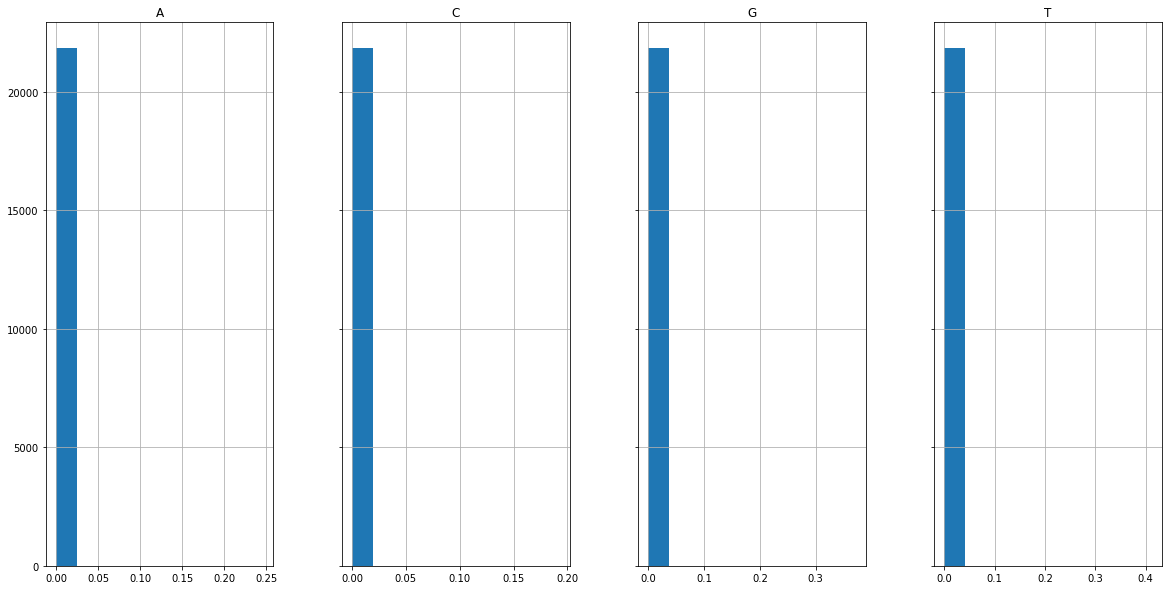

In [24]:
# Filter by threshold (adjust until we have roughly 50k - 100k positions)

interesting = freq[
    (freq['A'] > 0.0004)
    | (freq['C'] > 0.0004)
    | (freq['G'] > 0.0004)
    | (freq['T'] > 0.0004)]
interesting.hist(column=['A','C','G','T'], sharey=True, layout=(1, 4), figsize=(20,10))

In [40]:
# Export interesting positions

interesting.to_csv('interesting.csv',columns=['chrom', 'pos'], index=False)